In [46]:
import pandas as pd
inputs = "7"

df=pd.read_csv('csvs/' + inputs + 'lynx_train_X.csv', sep=' ',header=None)
new_train_X = df.values
df=pd.read_csv('csvs/' + inputs + 'lynx_train_Y.csv', sep=' ',header=None)
new_train_Y = df.values

X_train_inputs = []
Y_train_outputs = []

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# L = len(new_train_X)
L = len(new_train_X)
for i in range(L):
    X_train_inputs.append(tuple(new_train_X[i]))
for i in range(L):
    Y_train_outputs.append(tuple(new_train_Y[i]))

In [47]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

from __future__ import print_function
import neat

# 2-input XOR inputs and expected outputs.
xor_inputs = X_train_inputs
xor_outputs = Y_train_outputs


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 0.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        if_no_connect = True
        
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2
            if float(output[0]) != 0:
                if_no_connect = False
        
        if (if_no_connect == False):
            genome.fitness /= len(xor_inputs)
        else:
            genome.fitness = -1

In [48]:
# Load configuration.
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    "config-feedforward",
)

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(False))

# Run until a solution is found.
winner = p.run(eval_genomes, 100)

# Display the winning genome.
print("\nBest genome:\n{!s}".format(winner))

# Show output of the most fit genome against training data.
print("\nOutput:")
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
for xi, xo in zip(xor_inputs, xor_outputs):
    output = winner_net.activate(xi)
    #print("  input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))


 ****** Running generation 0 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 1.952, standard deviation 1.313
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.046 sec

 ****** Running generation 1 ****** 

Population's average fitness: -1.00489 stdev: 0.04870
Best fitness: -1.00000 - size: (1, 0) - species 1 - id 1
Average adjusted fitness: 0.326
Mean genetic distance 2.289, standard deviation 1.313
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.060 sec (0.053 average)

 ****** Running generation 2 ****** 

Population's average fitness: -1.00424 stdev: 0.11809
Best fitness: -0.10171 - size: (1, 1) - species 3 - id 280
Average adjusted fitness: 0.338
Mean genetic distance 2.583, standard deviation 1.351
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.068 sec (0.058 averag

Generation time: 0.086 sec (0.103 average)

 ****** Running generation 30 ****** 

Population's average fitness: -0.28286 stdev: 0.33406
Best fitness: -0.02795 - size: (1, 1) - species 14 - id 678
Average adjusted fitness: 0.812
Mean genetic distance 3.438, standard deviation 1.748
Population of 98 members in 16 species
Total extinctions: 0
Generation time: 0.086 sec (0.103 average)

 ****** Running generation 31 ****** 

Population's average fitness: -0.34866 stdev: 0.41700
Best fitness: -0.02795 - size: (1, 1) - species 14 - id 678
Average adjusted fitness: 0.791
Mean genetic distance 3.404, standard deviation 1.753
Population of 98 members in 16 species
Total extinctions: 0
Generation time: 0.090 sec (0.088 average)

 ****** Running generation 32 ****** 

Population's average fitness: -0.37079 stdev: 0.41972
Best fitness: -0.02795 - size: (1, 1) - species 14 - id 678
Average adjusted fitness: 0.776
Mean genetic distance 3.186, standard deviation 1.621
Population of 98 members in 16 

Generation time: 0.086 sec (0.092 average)

 ****** Running generation 55 ****** 

Population's average fitness: -0.30386 stdev: 0.37683
Best fitness: -0.02795 - size: (1, 1) - species 3 - id 678
Average adjusted fitness: 0.806
Mean genetic distance 3.040, standard deviation 1.658
Population of 102 members in 19 species
Total extinctions: 0
Generation time: 0.093 sec (0.090 average)

 ****** Running generation 56 ****** 

Population's average fitness: -0.33976 stdev: 0.36709
Best fitness: -0.02795 - size: (1, 1) - species 3 - id 678
Average adjusted fitness: 0.794
Mean genetic distance 2.983, standard deviation 1.630
Population of 95 members in 18 species
Total extinctions: 0
Generation time: 0.090 sec (0.089 average)

 ****** Running generation 57 ****** 

Population's average fitness: -0.32167 stdev: 0.38579
Best fitness: -0.02998 - size: (1, 1) - species 1 - id 4716
Average adjusted fitness: 0.815
Mean genetic distance 3.039, standard deviation 1.746
Population of 99 members in 18 s

Total extinctions: 0
Generation time: 0.096 sec (0.095 average)

 ****** Running generation 81 ****** 

Population's average fitness: -0.30534 stdev: 0.38891
Best fitness: -0.02988 - size: (2, 2) - species 6 - id 5434
Average adjusted fitness: 0.831
Mean genetic distance 2.767, standard deviation 1.350
Population of 100 members in 20 species
Total extinctions: 0
Generation time: 0.097 sec (0.096 average)

 ****** Running generation 82 ****** 

Population's average fitness: -0.30245 stdev: 0.37545
Best fitness: -0.02988 - size: (2, 2) - species 6 - id 5434
Average adjusted fitness: 0.824
Mean genetic distance 2.844, standard deviation 1.345
Population of 103 members in 20 species
Total extinctions: 0
Generation time: 0.094 sec (0.096 average)

 ****** Running generation 83 ****** 

Population's average fitness: -0.34076 stdev: 0.39831
Best fitness: -0.02988 - size: (2, 2) - species 6 - id 5434
Average adjusted fitness: 0.804
Mean genetic distance 2.753, standard deviation 1.365
Populati

In [49]:
import visualize

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
stats = neat.StatisticsReporter()

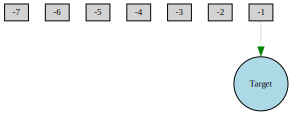

In [50]:
node_names = {-1: "-7", -2: "-6", -3: "-5", -4:"-4", -5:"-3", -6:"-2", -7:"-1",0: "Target"}
visualize.draw_net(config, winner, True, node_names=node_names)

In [13]:
import numpy as np
- np.sum(new_train_Y**2)/len(new_train_Y)

-0.1027440871826905

In [30]:
xor_outputs = [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]

In [32]:
xor_outputs == 0

False